### Import librairies
Nous importons les bibliothèque fondamentale pour la programme

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import donnée
Nous allons importer les données des trainSet et testSet dans les features et la variable à déviner

In [142]:
def importData(path, predictColumn=False):
    columnNames=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    #columnNames=["RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    delimit=','
    data = pd.read_csv(path, names=columnNames, sep=delimit)
    #data = data.drop(columns="ECP")
    if predictColumn:
        x=data.iloc[:, 1:-1].values
        y=data['FP'].values
        return x, y
    else:
        x=data.iloc[:,:].values
        return x

In [143]:
#pathTrain='../3-DataSet/dataFinale/p25/traintSet_p25.csv'
pathTrain='../3-DataSet/dataFinale/p27/traintSet_p27.csv'
#pathTrain='../3-DataSet/dataFinale/p30/traintSet_p30.csv'
X_train, y_train = importData(pathTrain,True)

#pathTest='../3-DataSet/dataFinale/p25/testSet_p25.csv'
pathTest='../3-DataSet/dataFinale/p27/testSet_p27.csv'
#pathTest='../3-DataSet/dataFinale/p30/testSet_p30.csv'
X_test, y_test = importData(pathTest,True)
X_test.shape

(356, 12)

### Normalisation et mise en echelle
Avant de faire des prédictions réelles, il est toujours recommandé de mettre à l'échelle les entités afin que toutes puissent être évaluées uniformément. 
L'algorithme de descente de gradient (qui est utilisé dans la formation de réseaux de neurones et d'autres algorithmes d'apprentissage automatique) converge également plus rapidement avec des fonctionnalités normalisées.
![](scaling.JPG)

In [144]:
from sklearn.preprocessing import StandardScaler

def scaleData(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)


X_train = scaleData(X_train)
X_test = scaleData(X_test)

### Classification & prediction
La régression logistique ou modèle logit est un modèle de régression binomiale. Comme pour tous les modèles de régression binomiale, il s'agit de modéliser au mieux un modèle mathématique simple à des observations réelles nombreuses. En d'autres termes d'associer à un vecteur de variables aléatoires (x1,... ,xn) une variable aléatoire binomiale génériquement notée y. La régression logistique constitue un cas particulier de modèle linéaire généralisé. Elle est largement utilisée en apprentissage automatique.

In [145]:
from sklearn.linear_model import LogisticRegression

#Classification
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [146]:
#prediction
y_pred = logreg.predict(X_test)

## Evaluation
Pour évaluer un algorithme, la matrice de confusion, la précision, le rappel et le score f1 sont les mesures les plus couramment utilisées. Les méthodes confusion_matrixet classification_reportde sklearn.metricspeuvent être utilisées pour calculer ces métriques. Jetez un œil au script suivant:

In [147]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

def printMetrics(yTest, yPred):
    print("Accuracy: ", metrics.accuracy_score(yTest, yPred))
    print("Ajusted Rand Square",metrics.adjusted_rand_score(yTest, yPred))
    
def showConfusionMatrix(ytest,ypred):
    print("Confusion Matrix \n",confusion_matrix(ytest, ypred))
    print("Repport: \n",classification_report(ytest, ypred))
    
def showScore(classifier, xtest, ytest):
    print('Score: %f' % classifier.score(xtest,ytest))
    print('Erreur: %f' % (1-classifier.score(xtest,ytest)))

In [148]:
showConfusionMatrix(y_test,y_pred)
showScore(logreg, X_test,y_test)
printMetrics(y_test, y_pred)

Confusion Matrix 
 [[328   0]
 [ 14  14]]
Repport: 
              precision    recall  f1-score   support

          0       0.96      1.00      0.98       328
          1       1.00      0.50      0.67        28

avg / total       0.96      0.96      0.95       356

Score: 0.960674
Erreur: 0.039326
Accuracy:  0.960674157303
Ajusted Rand Square 0.619402806859


### Save Model
Nous allons sauvegarder le model pour pouvoir l'utiliser pour la prochaine fois sans faire l'apprentissage désormais.

In [149]:
import pickle
filename = 'logreg_Model.sav'
pickle.dump(logreg, open(filename, 'wb'))

### Load Model
Pour réutiliser le model sans refaire l'apprentissage nous allons charger le model enregistrer

In [150]:
model = pickle.load(open(filename, 'rb'))

### Plot ROC curve
La courbe caractéristique de fonctionnement du récepteur (ROC) est un autre outil commun utilisé avec les classificateurs binaires. La ligne pointillée représente la courbe ROC d'un classificateur purement aléatoire; un bon classificateur reste aussi loin de cette ligne que possible (vers le coin supérieur gauche).

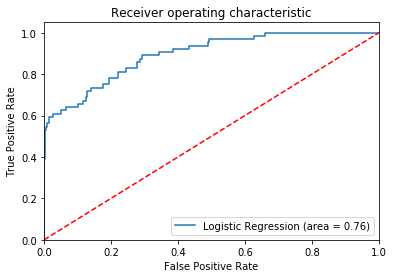

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Predict other Data
Nous allons maintenant tester la prédiction d'autres données qui ne sont pas les tests

In [136]:
path='../3-DataSet/dataFinale/p25/testSet_p25.csv'
#path='../3-DataSet/dataFinale/p27/testSet_p27.csv'
#path='../3-DataSet/dataFinale/p230/testSet_p30.csv'

#cols=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4"]
cols=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
toPredict = pd.read_csv(path,names=cols, sep=',')
toPredict.head(5)

,ECP,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,FP
0,3005FB63AC1F3681EC8815B921,9,-58.5,-52.0,-56.555556,1581420973596918,1581420974726948,1130030,-0.040071,3,0,6,0,0
1,E2806890000000001834376767,2,-63.0,-62.0,-62.500000,1581427757606159,1581427757711480,105321,-0.008000,0,0,2,0,0
2,E2806890000000001834531777,66,-63.5,-58.0,-60.045455,1581426772161856,1581426781271598,9109742,-0.016888,66,0,0,0,1
3,2005FB63EAC13681E4EC0FD224,4,-65.0,-59.0,-62.000000,1581420375415960,1581420375804651,388691,-0.038253,0,4,0,0,0
4,3005FB63AC1F3681EC88142830,7,-57.5,-45.0,-50.928571,1581414771515647,1581414773005717,1490070,-0.087408,7,0,0,0,0


In [137]:
#toPredict.loc[:,'RC':'A4']
X_toPredict = scaleData(toPredict.loc[:,'RC':'A4'])
y_toPredict = toPredict['FP']

new_pred = logreg.predict(X_toPredict)

showConfusionMatrix(y_toPredict,new_pred)
showScore(logreg, X_toPredict,y_toPredict)
printMetrics(y_toPredict, new_pred)

Confusion Matrix 
 [[217   1]
 [  2   6]]
Repport: 
              precision    recall  f1-score   support

          0       0.99      1.00      0.99       218
          1       0.86      0.75      0.80         8

avg / total       0.99      0.99      0.99       226

Score: 0.986726
Erreur: 0.013274
Accuracy:  0.986725663717
Ajusted Rand Square 0.781849563568


In [138]:
toPredict['IS_FP']=new_pred
toPredict

,ECP,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,FP,IS_FP
0,3005FB63AC1F3681EC8815B921,9,-58.5,-52.0,-56.555556,1581420973596918,1581420974726948,1130030,-0.040071,3,0,6,0,0,0
1,E2806890000000001834376767,2,-63.0,-62.0,-62.500000,1581427757606159,1581427757711480,105321,-0.008000,0,0,2,0,0,0
2,E2806890000000001834531777,66,-63.5,-58.0,-60.045455,1581426772161856,1581426781271598,9109742,-0.016888,66,0,0,0,1,1
3,2005FB63EAC13681E4EC0FD224,4,-65.0,-59.0,-62.000000,1581420375415960,1581420375804651,388691,-0.038253,0,4,0,0,0,0
4,3005FB63AC1F3681EC88142830,7,-57.5,-45.0,-50.928571,1581414771515647,1581414773005717,1490070,-0.087408,7,0,0,0,0,0
5,3005FB63AC1F3681EC88116627,2,-52.0,-52.0,-52.000000,1581419573582440,1581419573687269,104829,-0.000000,0,0,2,0,0,0
6,7336CEF1C1FE3682DEA1004C27,2,-54.5,-53.5,-54.000000,1581419574129930,1581419574275670,145740,-0.009259,0,0,2,0,0,0
7,7336CEF1C1FE3682DEA1004A31,4,-60.0,-52.5,-56.000000,1581415047199925,1581415047726415,526490,-0.058888,0,0,0,4,0,0
8,E2806890000000001834531775,62,-60.5,-57.5,-58.258065,1581429871609955,1581429880213044,8603089,-0.013326,62,0,0,0,1,1
9,7336CEF1C1FE3682DEA1005027,2,-56.5,-56.5,-56.500000,1581419574136143,1581419574289249,153106,-0.000000,0,0,2,0,0,0


### Export predict datas
Nous allons exporter les données predites en csv

In [109]:
#Export predict data
pathExport='../6-ClassifiedData/logReg_predict_30.csv'
toPredict.to_csv(pathExport, index = None, header=True)